# Assignment 2 Solution

## Importing modules

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Importing dataset and Basic-Level EDA (Exploratory Data Analysis)

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
print("Overview of the dataset")
print(df.head(),"\n\n") # To get an overview

print("Statistical Summary")
print(df.describe(),"\n\n") # To get statistical values

print("Datatypes")
print(df.info(),"\n\n") # gives us the datatype for columns

print("Number of null values in dataset")
print(df.isnull().sum(),"\n\n") # This ensures there is no empty cell

Overview of the dataset
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good   


Statistical Summary
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    

<ipython-input-4-22dcfa076906>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Air Quality', data=df, palette='viridis')


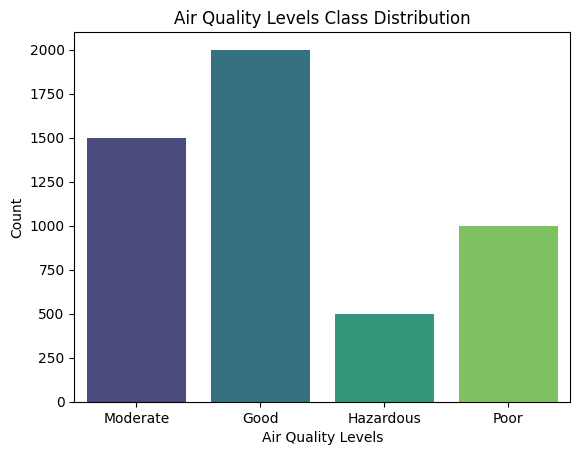

In [4]:
sns.countplot(x='Air Quality', data=df, palette='viridis')
plt.title("Air Quality Levels Class Distribution")
plt.xlabel("Air Quality Levels")
plt.ylabel("Count")
plt.show()

In [5]:
air_quality_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Poor': 2,
    'Hazardous': 3
}

df['Air Quality'] = df['Air Quality'].map(air_quality_mapping)

print(df['Air Quality'].head())

0    1
1    1
2    1
3    0
4    0
Name: Air Quality, dtype: int64


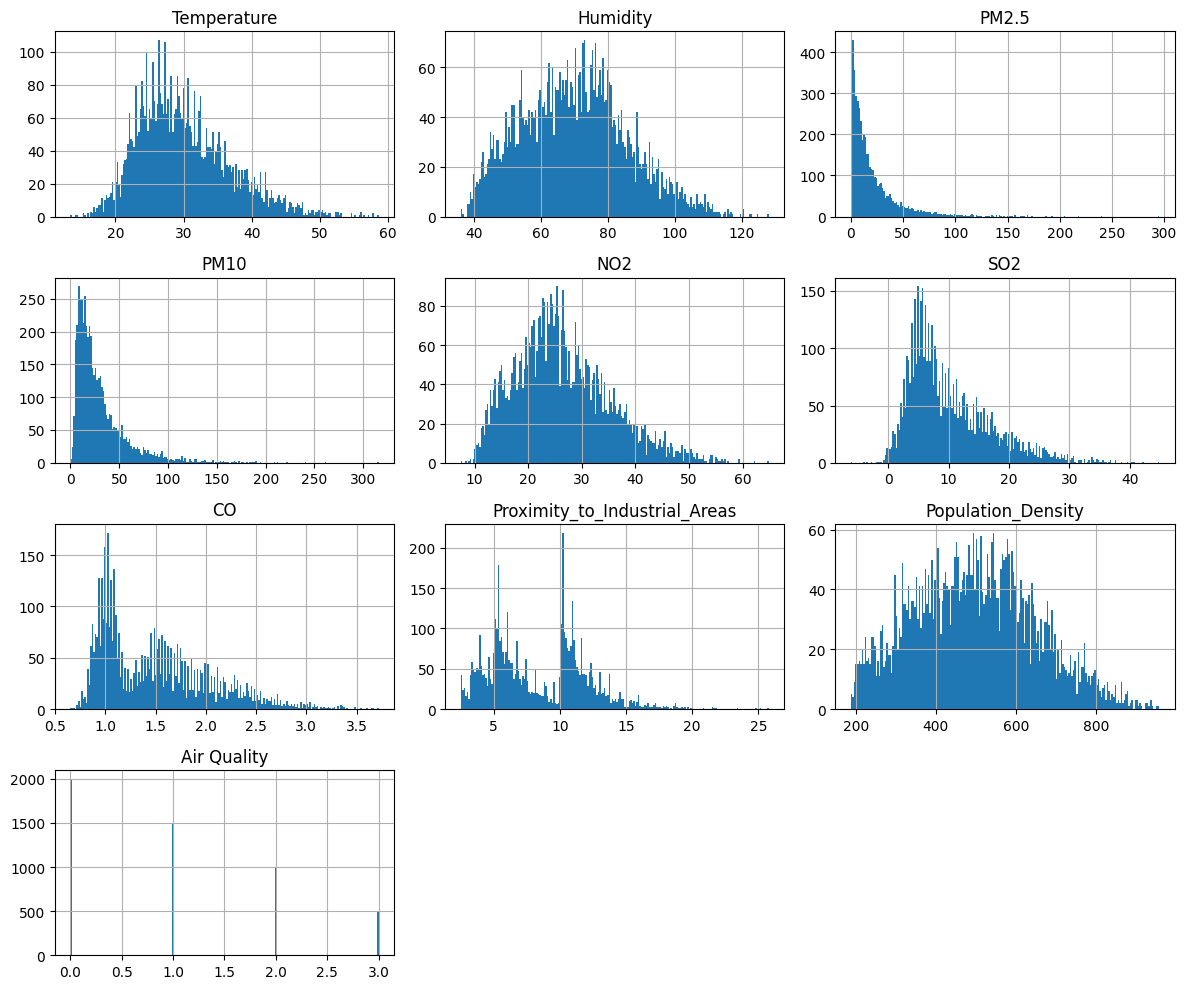

In [6]:
df.hist(figsize=(12, 10), bins=200)
plt.tight_layout()
plt.show()


Average values by Air Quality Levels:
                PM2.5        NO2  Temperature   Humidity       PM10        SO2  \
Air Quality                                                                     
0             9.9109  19.448450     24.94655  60.021950  14.989600   5.035000   
1            20.4618  26.435133     30.14200  70.211533  30.604333   9.976933   
2            29.2358  33.212800     34.86510  80.182900  44.452100  15.027000   
3            41.9208  40.596200     40.34780  89.473000  61.508000  20.023400   

                   CO  Proximity_to_Industrial_Areas  
Air Quality                                           
0            0.999590                      11.987900  
1            1.505293                       6.958667  
2            1.999030                       5.417000  
3            2.491240                       4.592400  


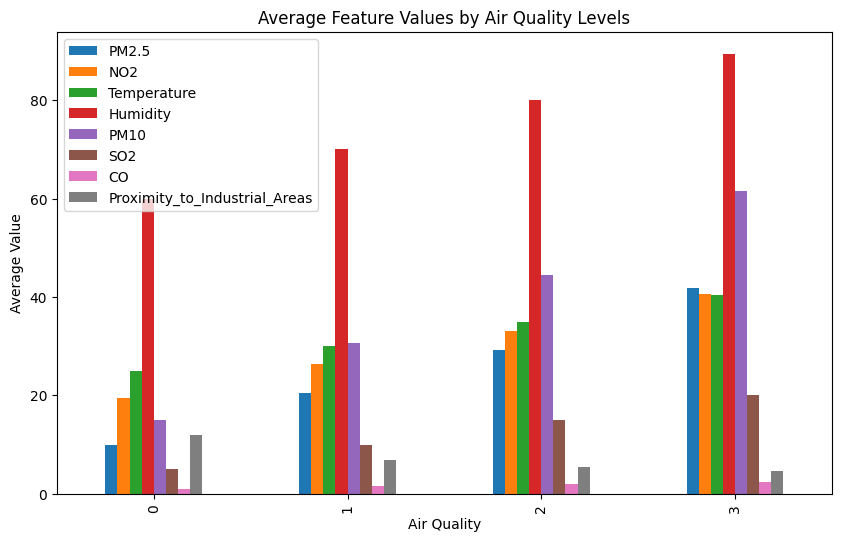

In [7]:
numerical_features = ['PM2.5', 'NO2', 'Temperature', 'Humidity', 'PM10', 'SO2', 'CO', 'Proximity_to_Industrial_Areas']
grouped_means = df.groupby('Air Quality')[numerical_features].mean()
print("Average values by Air Quality Levels:\n", grouped_means)

grouped_means.plot(kind='bar', figsize=(10, 6))
plt.title("Average Feature Values by Air Quality Levels")
plt.ylabel("Average Value")
plt.show()


In [8]:

print("Feature correlations with Target:\n", df.corr()['Air Quality'].sort_values(ascending=False))


Feature correlations with Target:
 Air Quality                      1.000000
CO                               0.912534
NO2                              0.785030
Temperature                      0.753567
SO2                              0.740201
Population_Density               0.645546
Humidity                         0.625546
PM10                             0.555691
PM2.5                            0.418171
Proximity_to_Industrial_Areas   -0.773637
Name: Air Quality, dtype: float64


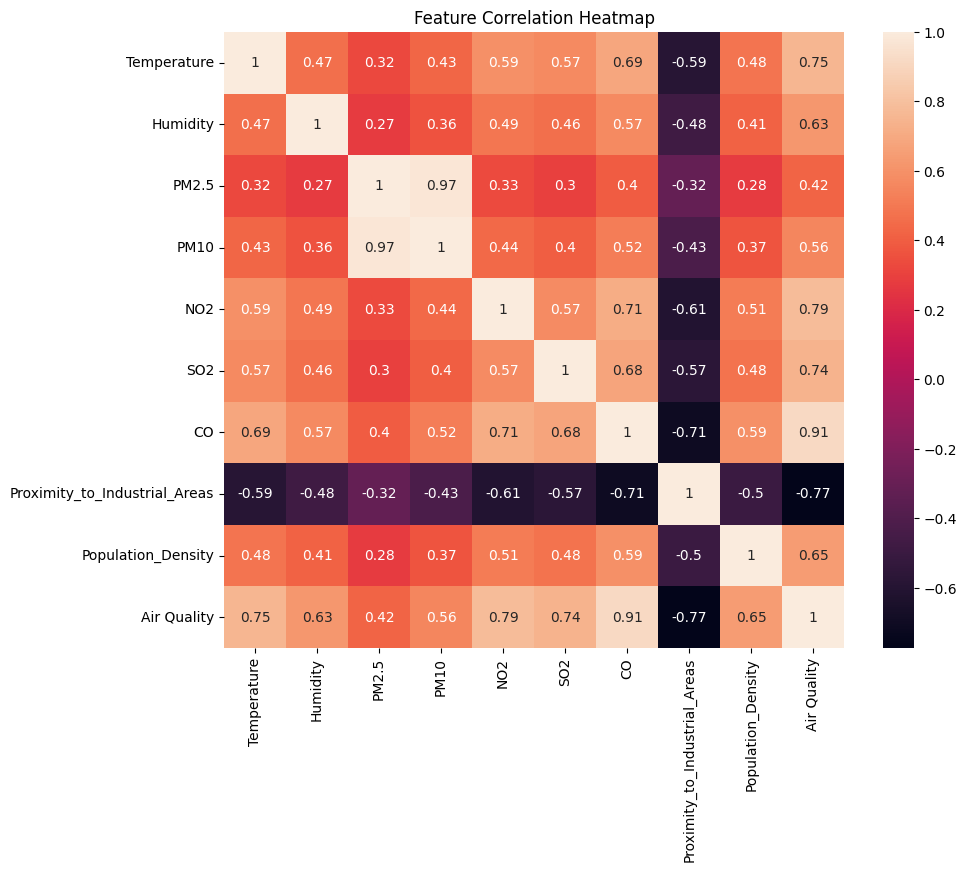

In [9]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting Test and Train Data

In [10]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### Scaling train and test dataset

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Training, Prediction and Metrics

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Precision Score:", precision_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Recall Score:", recall_score(y_test, y_pred_log, average='weighted'))


Logistic Regression Accuracy: 0.942
Logistic Regression F1-Score: 0.9414766901288926
Logistic Regression Precision Score: 0.9412923186858491
Logistic Regression Recall Score: 0.942


## Decision Tree Model Classifier Training, Prediction and Metrics
Along with best parameters using GridSearchCV


Decision Tree Accuracy: 0.927
Decision Tree F1-Score: 0.9264821324089143
Decision Tree Precision Score: 0.9263280910058788
Decision Tree Recall Score: 0.927
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       378
           1       0.92      0.94      0.93       319
           2       0.85      0.84      0.84       220
           3       0.86      0.78      0.82        83

    accuracy                           0.93      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000

{'max_depth': 11}


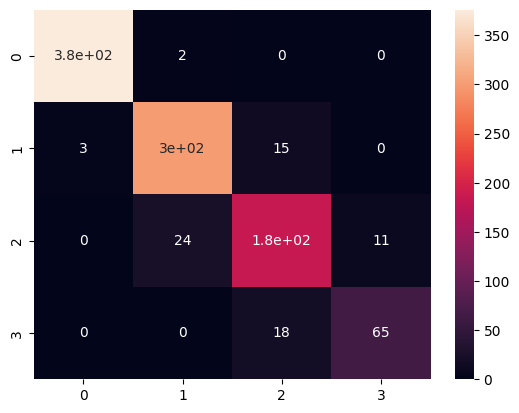

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=69, max_depth=11)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Precision Score:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Recall Score:", recall_score(y_test, y_pred_dt, average='weighted'))

Tree_params = {'max_depth': [1,3,5,7,9,11,13,15]}
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
Masterclf = GridSearchCV(dt, Tree_params, scoring='accuracy')


Masterclf.fit(X_train, y_train)
print(Masterclf.best_params_)

## Random Forest Classifier Training, Prediction and Metrics

Random Forest Accuracy: 0.96
Random Forest F1-Score: 0.9597759140146015
Random Forest Precision Score: 0.9597865945045259
Random Forest Recall Score: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       0.96      0.97      0.97       319
           2       0.91      0.91      0.91       220
           3       0.92      0.86      0.89        83

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

[[378   0   0   0]
 [  1 310   8   0]
 [  0  13 201   6]
 [  0   0  12  71]]
{'n_estimators': 62}


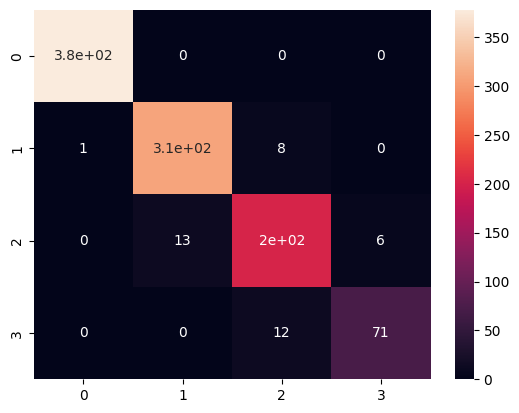

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier(n_estimators=62, class_weight='balanced', random_state=1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Precision Score:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Recall Score:", recall_score(y_test, y_pred_rf, average='weighted'))

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)


# 18 34 46 62 100
forest_params = {'n_estimators':[18,34,46,62,100]}

clf = GridSearchCV(rf, forest_params, scoring='accuracy')

clf.fit(X_train, y_train)
print(clf.best_params_)


## Comparing results of all 3 models on basis of Accuracy and F1 Scores

In [15]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

print(results)


                 Model  Accuracy  F1-Score
0  Logistic Regression     0.942  0.941477
1        Decision Tree     0.927  0.926482
2        Random Forest     0.960  0.959776


Clearly random forest performed better among all three with highest accuracy.

### Why random forest performed best among all three?

  **Handles Non-Linear Relationships**: The dataset contains complex relationships between environmental factors (e.g., PM2.5, NO2) and air quality levels. Random Forest can model these non-linear interactions effectively.

  **Reduces Overfitting**: By combining multiple decision trees (ensemble method) and using bootstrapped sampling, Random Forest generalizes better than a single Decision Tree.

  **Feature Importance**: Random Forest automatically identifies and focuses on the most relevant features, reducing the impact of less informative variables.

  **Handles Imbalanced Data well**: With class weighting (class_weight='balanced'), Random Forest compensates for the imbalance in air quality classes (e.g., "Hazardous" having fewer samples).